<a href="https://colab.research.google.com/github/LinuxFofinspiron/DataFirstUSSD/blob/main/epilepsy_seizure.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [24]:
!pip install opendatasets
!pip install scipy
!pip install sklearn
!pip install librosa

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/
Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


In [25]:
import opendatasets as od
import os
import numpy as np
import matplotlib.pyplot as plt
import scipy
import librosa

In [5]:
%matplotlib inline

In [5]:
od.download("https://www.kaggle.com/datasets/adibadea/chbmitseizuredataset")

100%|██████████| 635M/635M [00:03<00:00, 181MB/s]


In [6]:
DATASET_DIR = './chbmitseizuredataset' # Eoilepsy seizure dataset directory
trainX = None
trainY = None
testX = None
testY = None

In [7]:
dataFiles = []
for dirname,folder,filenames in os.walk(DATASET_DIR):
  for filename in filenames:
    dataFiles.append(dirname+'/'+filename)
print(dataFiles)

['./chbmitseizuredataset/eeg-seizure_val_balanced.npz', './chbmitseizuredataset/eeg-predictive_val.npz', './chbmitseizuredataset/eeg-seizure_train.npz', './chbmitseizuredataset/eeg-predictive_train.npz', './chbmitseizuredataset/eeg-predictive_val_balanced.npz', './chbmitseizuredataset/eeg-seizure_test.npz', './chbmitseizuredataset/eeg-seizure_val.npz']


In [8]:
train = np.load(dataFiles[2],allow_pickle=True)
trainX = train['train_signals']
trainY = train['train_labels']

In [9]:
print("Train features shape: {}".format(trainX.shape))
print("Train labels shape: {}".format(trainY.shape))

Train features shape: (37666, 23, 256)
Train labels shape: (37666,)


[  15.04273504    6.83760684    7.61904762    6.05616606    8.4004884
   12.30769231   13.47985348   13.08913309    8.79120879    5.27472527
   -1.36752137    0.58608059    1.75824176    5.27472527   11.91697192
   11.52625153   15.82417582   21.68498168   18.94993895   15.43345543
   17.77777778   14.65201465   20.51282051   22.85714286   30.67155067
   35.36019536   40.43956044   50.98901099   53.33333333   54.11477411
   50.5982906    43.56532357   42.39316239   39.26739927   39.65811966
   36.14163614   33.7973138    28.71794872   21.68498168   18.94993895
   15.43345543    7.61904762    6.44688645    2.14896215   -1.36752137
   -2.53968254   -3.32112332   -8.00976801  -15.04273504  -20.51282051
  -18.16849817  -17.38705739  -12.30769231  -13.08913309  -20.9035409
  -25.59218559  -28.32722833  -28.71794872  -32.23443223  -34.57875458
  -38.48595849  -37.7045177   -33.01587302  -27.54578755  -20.9035409
  -24.02930403  -25.59218559  -29.10866911  -33.7973138   -31.84371184
  -27.155

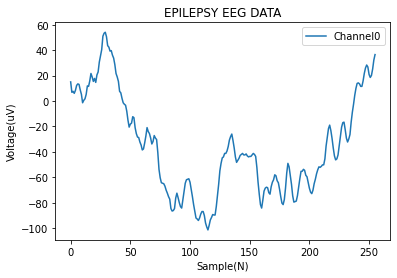

In [10]:
# Acquire a single sample of EEG data
sampleData = trainX[0] # First data sample
sampleDataChannel = sampleData[0] # First channel of the data sample

# Print the first channel sample points
print(sampleDataChannel)
# Plot a single sample
plt.plot(sampleDataChannel)

plt.title("EPILEPSY EEG DATA")
plt.xlabel("Sample(N)")
plt.ylabel("Voltage(uV)")

plt.legend(['Channel0'])

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an axes using the same arguments as a previous axes currently reuses the earlier instance.  In a future version, a new instance will always be created and returned.  Meanwhile, this warning can be suppressed, and the future behavior ensured, by passing a unique label to each axes instance.
  # Remove the CWD from sys.path while we load stuff.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:10: MatplotlibDeprecationWarning: Adding an a

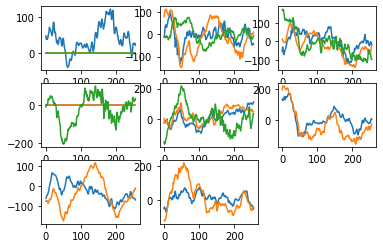

In [11]:
count = 1
for i in range(1,9):
  pltLoc = '33'+ str(i)
  plt.subplot(pltLoc)
  plt.plot(sampleData[count])
  count += 1

for i in range(1,9):
  pltLoc = '33'+ str(i)
  plt.subplot(pltLoc)
  plt.plot(sampleData[count])
  count += 1

for i in range(1,6):
  pltLoc = '33'+ str(i)
  plt.subplot(pltLoc)
  plt.plot(sampleData[count])
  count += 1


In [12]:
print(trainY[0]) # First subject class

1


In [13]:
# Now let's work in the frequency domain with FFT Spectrograms

In [14]:
Fs = 256 # Sampling frequency of acquisition of MIT CHB Epilepsy dataset  

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: Only one segment is calculated since parameter NFFT (=256) >= signal length (=256).
  """Entry point for launching an IPython kernel.


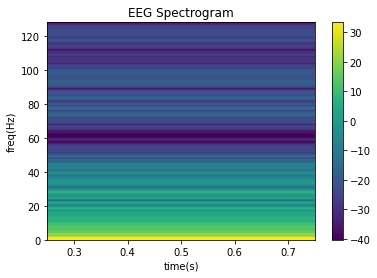

In [46]:

spec = plt.specgram(sampleDataChannel,Fs=Fs)
plt.title("EEG Spectrogram")
plt.xlabel('time(s)')
plt.ylabel('freq(Hz)')
plt.colorbar()